Training R² Score: 0.8770
Testing R² Score: -10.7408
Mean Squared Error (MSE): 282611.0829


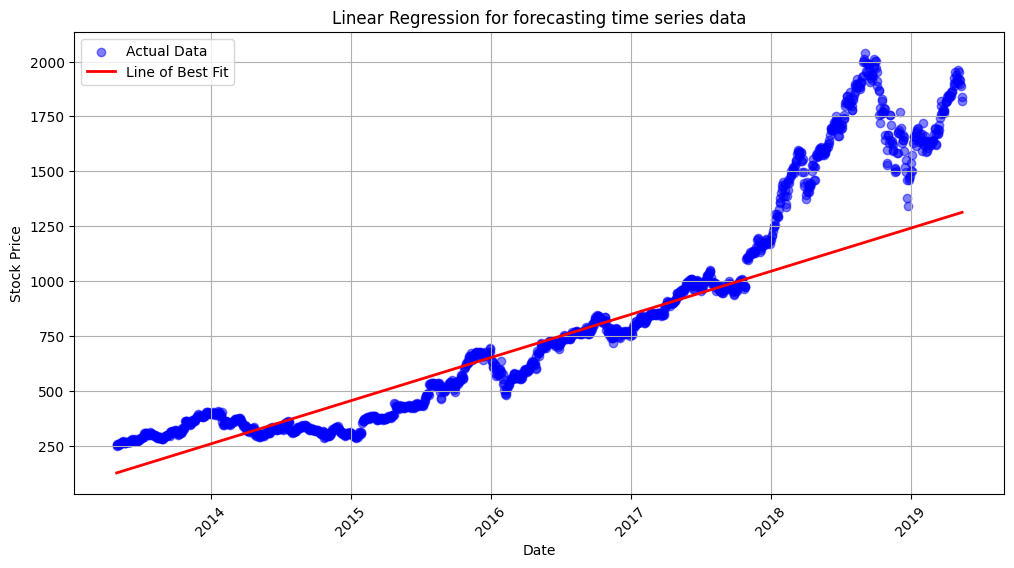

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/portfolio_data.csv", parse_dates=["Date"], index_col="Date")

# Convert date index to numerical values
df["Days"] = (df.index - df.index.min()).days

# Select features & target
X = df[["Days"]]
y = df["AMZN"]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Compute Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Generate predictions for full dataset (Line of Best Fit)
y_pred_best_fit = linear_model.predict(X)

# Extend forecast for the next 60 days
future_days = np.arange(df["Days"].max() + 1, df["Days"].max() + 61).reshape(-1, 1)
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=60)

# Predict future stock prices
y_pred_forecast = linear_model.predict(future_days)

#plotting the forecasting time series data
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df["AMZN"], label="Actual Data", color="blue", alpha=0.5)
plt.plot(df.index, y_pred_best_fit, label="Line of Best Fit", color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Linear Regression for forecasting time series data")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

